In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import statistics
from scipy.optimize import curve_fit
from scipy import stats


data = pd.read_csv ("Allsupernovae.csv") #reading in supernovae data and creating data frame 'data'

cosmo = FlatLambdaCDM(H0=70, Om0=0.287) #H0 value from Betoule et al. 2014, omega_m best fit value from JLA sample, 
                                        #cosmological model assuming flat Universe 


#Calculating luminosity distances for supernovae
data['d_L'] = cosmo.luminosity_distance(data.zcmb) #changing cmb redshift to distance in Mpc


#Distance modulus eq 
#mu = 5log(d_L/10pc) or bmag-absmag = mu = 5 log10(D_L) + 25 if D_L is in Mpc
data['mu'] = 5*(np.log10(data.d_L)) + 25

#best vals distance modulus (w/out mass step function)
data['distance_modulus'] = data.mb - (-19.10 - 0.117*data.X1 + 2.450*data.c)
data['error_dm'] = (data.error_mb + (0.01 + (0.117*data.error_X1 + 0.006*data.X1) + 
                                    (2.450*data.error_c + 0.075*data.c)))


#Betoule's distance modulus (w/out mass step function)
data['Bet_distance_modulus'] = data.mb - (data.MB1 - 0.141*data.X1 + 3.101*data.c)
data['error_dm_bet'] = data.error_mb + ((data.error_MB1) + (data.alpha*data.error_X1 + data.error_alpha*data.X1) 
                       + (data.beta*data.error_c + data.error_beta*data.c))

#residuals for my correction
data['residuals'] = data.distance_modulus - data.mu

#residuals for Betoule's correction
data['residuals_bet'] = data.Bet_distance_modulus - data.mu 


#selecting low mass data 
low_mass = data[(data.LogMst > 7) & (data.LogMst < 10)] #creating 'low_mass' data frame with supernovae with 7<LogMst<10 
low_mass_LogMst = low_mass.LogMst

#selecting high mass data 
high_mass = data[(data.LogMst >= 10)] #creating 'high_mass' data frame with supernovae with LogMst>10 

#errors due to uncertainty in host mass
data['uppermass'] = data.LogMst + data.error_Mst
data['lowermass'] = data.LogMst - data.error_Mst
data['uppermass_err'] = np.where((data.LogMst < 10) & (data.uppermass >=10), 0.08**2, 0) #from Betoule et al. 2014 section 5
data['lowermass_err'] = np.where((data.LogMst > 10) & (data.lowermass <=10), 0.08**2, 0)

#total error
data['err_tot'] = data.error_dm + data.uppermass_err + data.lowermass_err
data['beterr_tot'] = data.error_dm_bet + data.uppermass_err + data.lowermass_err

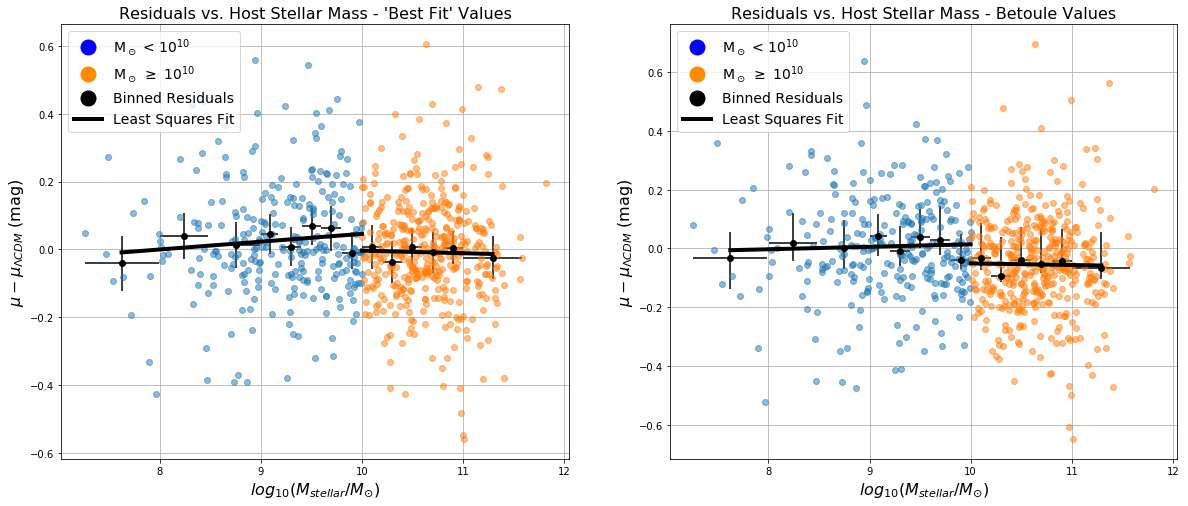

In [2]:
#bins
hist_data = data[(data.LogMst > 7)] 
hist, bins = np.histogram(hist_data.LogMst, bins=15)

bin_1 = data[(data.LogMst >= 7.25) & (data.LogMst < 8.00)] 
bin_2 = data[(data.LogMst >= 8.00) & (data.LogMst < 8.50)]
bin_3 = data[(data.LogMst >= 8.50) & (data.LogMst < 9.00)] 
bin_4 = data[(data.LogMst >= 9.00) & (data.LogMst < 9.20)] 
bin_5 = data[(data.LogMst >= 9.20) & (data.LogMst < 9.40)] 
bin_6 = data[(data.LogMst >= 9.40) & (data.LogMst < 9.60)] 
bin_7 = data[(data.LogMst >= 9.60) & (data.LogMst < 9.80)] 
bin_8 = data[(data.LogMst >= 9.80) & (data.LogMst < 10.00)] 
bin_9 = data[(data.LogMst >= 10.00) & (data.LogMst < 10.20)] 
bin_10 = data[(data.LogMst >= 10.20) & (data.LogMst < 10.40)] 
bin_11 = data[(data.LogMst >= 10.40) & (data.LogMst < 10.60)] 
bin_12 = data[(data.LogMst >= 10.60) & (data.LogMst < 10.80)]
bin_13 = data[(data.LogMst >= 10.80) & (data.LogMst < 11.00)]
bin_14 = data[(data.LogMst >= 11.00) & (data.LogMst <= 11.80)]

#finding the midpoint of each bin
midpoint_1 = (max(bin_1.LogMst) + min(bin_1.LogMst))/2
midpoint_2 = (max(bin_2.LogMst) + min(bin_2.LogMst))/2
midpoint_3 = (max(bin_3.LogMst) + min(bin_3.LogMst))/2
midpoint_4 = (max(bin_4.LogMst) + min(bin_4.LogMst))/2
midpoint_5 = (max(bin_5.LogMst) + min(bin_5.LogMst))/2
midpoint_6 = (max(bin_6.LogMst) + min(bin_6.LogMst))/2
midpoint_7 = (max(bin_7.LogMst) + min(bin_7.LogMst))/2
midpoint_8 = (max(bin_8.LogMst) + min(bin_8.LogMst))/2
midpoint_9 = (max(bin_9.LogMst) + min(bin_9.LogMst))/2
midpoint_10 = (max(bin_10.LogMst) + min(bin_10.LogMst))/2
midpoint_11 = (max(bin_11.LogMst) + min(bin_11.LogMst))/2
midpoint_12 = (max(bin_12.LogMst) + min(bin_12.LogMst))/2
midpoint_13 = (max(bin_13.LogMst) + min(bin_13.LogMst))/2
midpoint_14 = (max(bin_14.LogMst) + min(bin_14.LogMst))/2

midpoint = [midpoint_1, midpoint_2, midpoint_3, midpoint_4, midpoint_5, midpoint_6, midpoint_7, 
            midpoint_8, midpoint_9, midpoint_10, midpoint_11, midpoint_12, midpoint_13, midpoint_14]
    
#weights of errors in each bin
weight_1 = 1/(np.abs(np.average(bin_1.err_tot)))
weight_2 = 1/(np.abs(np.average(bin_2.err_tot)))
weight_3 = 1/(np.abs(np.average(bin_3.err_tot)))
weight_4 = 1/(np.abs(np.average(bin_4.err_tot)))
weight_5 = 1/(np.abs(np.average(bin_5.err_tot)))
weight_6 = 1/(np.abs(np.average(bin_6.err_tot)))
weight_7 = 1/(np.abs(np.average(bin_7.err_tot)))
weight_8 = 1/(np.abs(np.average(bin_8.err_tot)))
weight_9 = 1/(np.abs(np.average(bin_9.err_tot)))
weight_10 = 1/(np.abs(np.average(bin_10.err_tot)))
weight_11 = 1/(np.abs(np.average(bin_11.err_tot)))
weight_12 = 1/(np.abs(np.average(bin_12.err_tot)))
weight_13 = 1/(np.abs(np.average(bin_13.err_tot)))
weight_14 = 1/(np.abs(np.average(bin_14.err_tot)))

weight = [weight_1, weight_2, weight_3, weight_4, weight_5, weight_6, weight_7, weight_8, weight_9, 
          weight_10, weight_11, weight_12, weight_13, weight_14]
    
    
#weights for betoule (1/error)
betweight_1 = 1/(np.abs(np.average(bin_1.beterr_tot)))
betweight_2 = 1/(np.abs(np.average(bin_2.beterr_tot)))
betweight_3 = 1/(np.abs(np.average(bin_3.beterr_tot)))
betweight_4 = 1/(np.abs(np.average(bin_4.beterr_tot)))
betweight_5 = 1/(np.abs(np.average(bin_5.beterr_tot)))
betweight_6 = 1/(np.abs(np.average(bin_6.beterr_tot)))
betweight_7 = 1/(np.abs(np.average(bin_7.beterr_tot)))
betweight_8 = 1/(np.abs(np.average(bin_8.beterr_tot)))
betweight_9 = 1/(np.abs(np.average(bin_9.beterr_tot)))
betweight_10 = 1/(np.abs(np.average(bin_10.beterr_tot)))
betweight_11 = 1/(np.abs(np.average(bin_11.beterr_tot)))
betweight_12 = 1/(np.abs(np.average(bin_12.beterr_tot)))
betweight_13 = 1/(np.abs(np.average(bin_13.beterr_tot)))
betweight_14 = 1/(np.abs(np.average(bin_14.beterr_tot)))

betweight = [betweight_1, betweight_2, betweight_3, betweight_4, betweight_5, betweight_6, betweight_7, 
             betweight_8, betweight_9, betweight_10, betweight_11, betweight_12, betweight_13, betweight_14]    

#mean residuals
mean_1 = np.average(bin_1.residuals, weights = 1/bin_1.err_tot)
mean_2 = np.average(bin_2.residuals, weights = 1/bin_2.err_tot)
mean_3 = np.average(bin_3.residuals, weights = 1/bin_3.err_tot)
mean_4 = np.average(bin_4.residuals, weights = 1/bin_4.err_tot)
mean_5 = np.average(bin_5.residuals, weights = 1/bin_5.err_tot)
mean_6 = np.average(bin_6.residuals, weights = 1/bin_6.err_tot)
mean_7 = np.average(bin_7.residuals, weights = 1/bin_7.err_tot)
mean_8 = np.average(bin_8.residuals, weights = 1/bin_8.err_tot)
mean_9 = np.average(bin_9.residuals, weights = 1/bin_9.err_tot)
mean_10 = np.average(bin_10.residuals, weights = 1/bin_10.err_tot)
mean_11 = np.average(bin_11.residuals, weights = 1/bin_11.err_tot)
mean_12 = np.average(bin_12.residuals, weights = 1/bin_12.err_tot)
mean_13 = np.average(bin_13.residuals, weights = 1/bin_13.err_tot)
mean_14 = np.average(bin_14.residuals, weights = 1/bin_14.err_tot)


mean = [mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, mean_10, mean_11, mean_12,
       mean_13, mean_14]

#mean residuals for bet
betmean_1 = np.average(bin_1.residuals_bet, weights = 1/bin_1.beterr_tot)
betmean_2 = np.average(bin_2.residuals_bet, weights = 1/bin_2.beterr_tot)
betmean_3 = np.average(bin_3.residuals_bet, weights = 1/bin_3.beterr_tot)
betmean_4 = np.average(bin_4.residuals_bet, weights = 1/bin_4.beterr_tot)
betmean_5 = np.average(bin_5.residuals_bet, weights = 1/bin_5.beterr_tot)
betmean_6 = np.average(bin_6.residuals_bet, weights = 1/bin_6.beterr_tot)
betmean_7 = np.average(bin_7.residuals_bet, weights = 1/bin_7.beterr_tot)
betmean_8 = np.average(bin_8.residuals_bet, weights = 1/bin_8.beterr_tot)
betmean_9 = np.average(bin_9.residuals_bet, weights = 1/bin_9.beterr_tot)
betmean_10 = np.average(bin_10.residuals_bet, weights = 1/bin_10.beterr_tot)
betmean_11 = np.average(bin_11.residuals_bet, weights = 1/bin_11.beterr_tot)
betmean_12 = np.average(bin_12.residuals_bet, weights = 1/bin_12.beterr_tot)
betmean_13 = np.average(bin_13.residuals_bet, weights = 1/bin_13.beterr_tot)
betmean_14 = np.average(bin_14.residuals_bet, weights = 1/bin_14.beterr_tot)

betmean = [betmean_1, betmean_2, betmean_3, betmean_4, betmean_5, betmean_6, betmean_7, betmean_8, 
           betmean_9, betmean_10, betmean_11, betmean_12, betmean_13, betmean_14]



fig = plt.figure(figsize=(20,8))

#my residuals data
plt.subplot(121)
plt.plot(low_mass.LogMst, low_mass.residuals, 'o', alpha=0.5)
plt.plot(high_mass.LogMst, high_mass.residuals, 'o', alpha=0.5)
plt.title('Residuals vs. Host Stellar Mass - \'Best Fit\' Values', fontsize=16)
plt.xlabel('$log_{10}(M_{stellar}/M_{\odot})$', fontsize=16)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$ (mag)', fontsize=16)


plt.plot(midpoint, mean, 'ko')

#regression line for weighted averages (low and high mass)
slope_low, intercept_low, r_value_low, p_value_low, std_err_low = stats.linregress(midpoint[0:8], mean[0:8])
slope_high, intercept_high, r_value_high, p_value_high, std_err_high = stats.linregress(midpoint[8:14], mean[8:14])

#finding the value at LogMst = 10 for each line
low_10 = slope_low*(10) + intercept_low
high_10 = slope_high*(10) + intercept_high

#finding the step between the high and low mass data
step = high_10 - low_10

#to plot the slope against the midpoints of the bins
low_y = []
for i in range (0, 8, 1):
    t = slope_low*midpoint[i] + intercept_low
    low_y.append((t))

high_y = []
for i in range (8, 14, 1):
    t = slope_high*midpoint[i] + intercept_high
    high_y.append((t))


plt.plot(midpoint[0:8] , low_y, color='k', linewidth=4)
plt.plot(midpoint[8:14], high_y, color='k', linewidth=4)
plt.plot((midpoint[7], 10), (low_y[7], slope_low*10 + intercept_low), 'k', linewidth=4)
plt.plot((midpoint[8], 10), (high_y[0], slope_high*10 + intercept_high), 'k', linewidth=4)


#error bars (x dir)
#right hand errors
err_1r = max(bin_1.LogMst) - midpoint[0]
err_2r = max(bin_2.LogMst) - midpoint[1]
err_3r = max(bin_3.LogMst) - midpoint[2]
err_4r = max(bin_4.LogMst) - midpoint[3]
err_5r = max(bin_5.LogMst) - midpoint[4]
err_6r = max(bin_6.LogMst) - midpoint[5]
err_7r = max(bin_7.LogMst) - midpoint[6]
err_8r = max(bin_8.LogMst) - midpoint[7]
err_9r = max(bin_9.LogMst) - midpoint[8]
err_10r = max(bin_10.LogMst) - midpoint[9]
err_11r = max(bin_11.LogMst) - midpoint[10]
err_12r = max(bin_12.LogMst) - midpoint[11]
err_13r = max(bin_13.LogMst) - midpoint[12]
err_14r = max(bin_14.LogMst) - midpoint[13]

err_right = [err_1r, err_2r, err_3r, err_4r, err_5r, err_6r, err_7r, err_8r, err_9r, err_10r, err_11r, err_12r, 
             err_13r, err_14r]

#left hand errors 
err_1l = midpoint[0] - min(bin_1.LogMst)  
err_2l = midpoint[1] - min(bin_2.LogMst) 
err_3l = midpoint[2] - min(bin_3.LogMst) 
err_4l = midpoint[3] - min(bin_4.LogMst) 
err_5l = midpoint[4] - min(bin_5.LogMst) 
err_6l = midpoint[5] - min(bin_6.LogMst) 
err_7l = midpoint[6] - min(bin_7.LogMst) 
err_8l = midpoint[7] - min(bin_8.LogMst) 
err_9l = midpoint[8] - min(bin_9.LogMst) 
err_10l = midpoint[9] - min(bin_10.LogMst) 
err_11l = midpoint[10] - min(bin_11.LogMst) 
err_12l = midpoint[11] - min(bin_12.LogMst) 
err_13l = midpoint[12] - min(bin_13.LogMst) 
err_14l = midpoint[13] - min(bin_14.LogMst) 

err_left = [err_1l, err_2l, err_3l, err_4l, err_5l, err_6l, err_7l, err_8l, err_9l, err_10l, err_11l, err_12l, 
             err_13l, err_14l]

asym_errx = [err_left, err_right]
plt.errorbar(midpoint[0:14], mean[0:14], xerr=asym_errx, fmt='none', color='k', alpha=1)

#error bars (y dir)
erry1 = statistics.stdev(bin_1.err_tot)  
erry2 = statistics.stdev(bin_2.err_tot) 
erry3 = statistics.stdev(bin_3.err_tot) 
erry4 = statistics.stdev(bin_4.err_tot) 
erry5 = statistics.stdev(bin_5.err_tot) 
erry6 = statistics.stdev(bin_6.err_tot) 
erry7 = statistics.stdev(bin_7.err_tot) 
erry8 = statistics.stdev(bin_8.err_tot) 
erry9 = statistics.stdev(bin_9.err_tot) 
erry10 = statistics.stdev(bin_10.err_tot) 
erry11 = statistics.stdev(bin_11.err_tot) 
erry12 = statistics.stdev(bin_12.err_tot) 
erry13 = statistics.stdev(bin_13.err_tot) 
erry14 = statistics.stdev(bin_14.err_tot) 

erry = [erry1, erry2, erry3, erry4, erry5, erry6, erry7, erry8, erry9, erry10, erry11, erry12, 
             erry13, erry14]
plt.errorbar(midpoint[0:14], mean[0:14], yerr=erry, fmt='none', color='k', alpha=1)

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o',markersize=15, linestyle='none', label='M$_\odot$ < 10$^{10}$')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o', linestyle='none', markersize=15, 
                            label='M$_\odot$ $\geq$ 10$^{10}$')
black_dots = mlines.Line2D([], [], color='k', marker='o', markersize=15,linestyle='none', label='Binned Residuals')
black_line = mlines.Line2D([], [], color='k', marker='_',linewidth='4', label='Least Squares Fit')
plt.legend(handles=[blue_line, orange_line, black_dots, black_line], fontsize=14)
plt.grid(True)




#Betoule's residuals data for comparison of method
plt.subplot(122)
plt.plot(low_mass.LogMst, low_mass.residuals_bet, 'o', alpha=0.5)
plt.plot(high_mass.LogMst, high_mass.residuals_bet, 'o', alpha=0.5)
plt.plot(midpoint, betmean, 'ko')
plt.title('Residuals vs. Host Stellar Mass - Betoule Values', fontsize=16)
plt.xlabel('$log_{10}(M_{stellar}/M_{\odot})$', fontsize=16)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$ (mag)', fontsize=16)

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o', markersize=15, linestyle='none', 
                          label='M$_\odot$ < 10$^{10}$')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o', markersize=15, 
                        linestyle='none', label='M$_\odot$ $\geq$ 10$^{10}$')
black_dots = mlines.Line2D([], [], color='k', marker='o', markersize=15,linestyle='none', label='Binned Residuals')
black_line = mlines.Line2D([], [], color='k', marker='_',linewidth='4', label='Least Squares Fit')
plt.legend(handles=[blue_line, orange_line, black_dots, black_line], fontsize=14)


#regression line for weighted averages (high and low mass)
slope_lowbet, intercept_lowbet, r_value_lowbet, p_value_lowbet, std_err_lowbet = stats.linregress(midpoint[0:8], betmean[0:8])

slope_highbet, intercept_highbet, r_value_highbet, p_value_highbet, std_err_highbet = stats.linregress(midpoint[8:14], betmean[8:14])

#finding the value at LogMst = 10 for each line
lowbet_10 = slope_lowbet*(10)+ intercept_lowbet
highbet_10 = slope_highbet*(10) + intercept_highbet

#finding the step between the high and low mass data
betstep = highbet_10 - lowbet_10

#to plot the slope against the midpoints of the bins
lowbet_y = []
for i in range (0, 8, 1):
    t = slope_lowbet*midpoint[i] + intercept_lowbet
    lowbet_y.append((t))

highbet_y = []
for i in range (8, 14, 1):
    t = slope_highbet*midpoint[i] + intercept_highbet
    highbet_y.append((t))


plt.plot(midpoint[0:8] , lowbet_y, color='k', linewidth=4)
plt.plot(midpoint[8:14], highbet_y, color='k', linewidth=4)
plt.plot((midpoint[7], 10), (lowbet_y[7], slope_lowbet*10 + intercept_lowbet), 'k', linewidth=4)
plt.plot((midpoint[8], 10), (highbet_y[0], slope_highbet*10 + intercept_highbet), 'k', linewidth=4)


#error bars (x dir)
plt.errorbar(midpoint[0:14], betmean[0:14], xerr=asym_errx, fmt='none', color='k', alpha=1)

#error bars (y dir)
beterry1 = statistics.stdev(bin_1.beterr_tot)  
beterry2 = statistics.stdev(bin_2.beterr_tot) 
beterry3 = statistics.stdev(bin_3.beterr_tot) 
beterry4 = statistics.stdev(bin_4.beterr_tot) 
beterry5 = statistics.stdev(bin_5.beterr_tot) 
beterry6 = statistics.stdev(bin_6.beterr_tot) 
beterry7 = statistics.stdev(bin_7.beterr_tot) 
beterry8 = statistics.stdev(bin_8.beterr_tot) 
beterry9 = statistics.stdev(bin_9.beterr_tot) 
beterry10 = statistics.stdev(bin_10.beterr_tot) 
beterry11 = statistics.stdev(bin_11.beterr_tot) 
beterry12 = statistics.stdev(bin_12.beterr_tot) 
beterry13 = statistics.stdev(bin_13.beterr_tot) 
beterry14 = statistics.stdev(bin_14.beterr_tot) 

beterry = [beterry1, beterry2, beterry3, beterry4, beterry5, beterry6, beterry7, beterry8, beterry9, beterry10, beterry11, 
           beterry12, beterry13, beterry14]
plt.errorbar(midpoint[0:14], mean[0:14], yerr=beterry, fmt='none', color='k', alpha=1)

plt.grid(True)

plt.show()



fig.savefig('Delta M.pdf')
plt.close(fig)

In [3]:
betstep

-0.064788751314539622

In [4]:
step

-0.049399486739048107

In [4]:
#with single bin either side
bin_low = data[(data.LogMst >= 7.25) & (data.LogMst < 10)]
bin_high = data[(data.LogMst >= 10)]

midpoint_low = (max(bin_low.LogMst) + min(bin_low.LogMst))/2
midpoint_high = (max(bin_high.LogMst) + min(bin_high.LogMst))/2

weight_low = 1/(np.abs(np.average(bin_low.err_tot)))
weight_high = 1/(np.abs(np.average(bin_high.err_tot)))
                
mean_low = np.average(bin_low.residuals, weights = 1/bin_low.err_tot)
mean_high = np.average(bin_high.residuals, weights = 1/bin_high.err_tot)

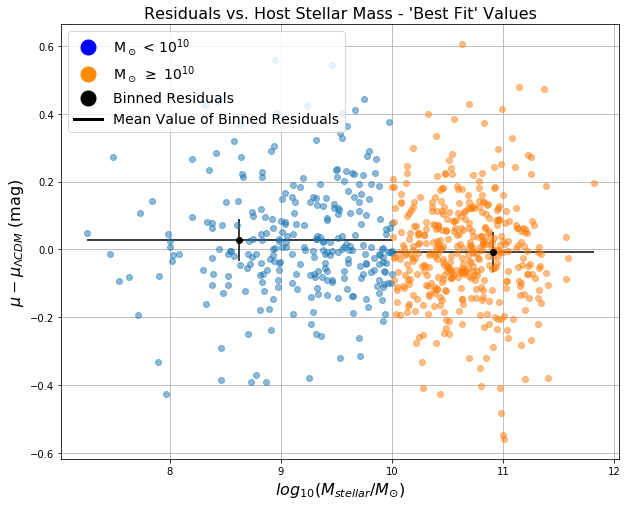

In [36]:
fig = plt.figure(figsize=(10,8))
plt.plot(low_mass.LogMst, low_mass.residuals, 'o', alpha=0.5)
plt.plot(high_mass.LogMst, high_mass.residuals, 'o', alpha=0.5)
plt.title('Residuals vs. Host Stellar Mass - \'Best Fit\' Values', fontsize=16)
plt.xlabel('$log_{10}(M_{stellar}/M_{\odot})$', fontsize=16)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$ (mag)', fontsize=16)

plt.plot(midpoint_low, mean_low, 'ko')
plt.plot(midpoint_high, mean_high, 'ko')

 
#error bars (y dir)
low_err = statistics.stdev(bin_low.err_tot)
high_err = statistics.stdev(bin_high.err_tot)
plt.errorbar(midpoint_low, mean_low, yerr=low_err, fmt='none', color='k', alpha=1)
plt.errorbar(midpoint_high, mean_high, yerr=high_err, fmt='none', color='k', alpha=1)

#error bars (x dir)
low_err_x = midpoint_low - (min(bin_low.LogMst))
high_err_x = midpoint_high - (min(bin_high.LogMst))

plt.errorbar(midpoint_low, mean_low, xerr=low_err_x, fmt='none', color='k', alpha=1)
plt.errorbar(midpoint_high, mean_high, xerr=high_err_x, fmt='none', color='k', alpha=1)

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o', markersize=15, linestyle='none', 
                          label='M$_\odot$ < 10$^{10}$')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o', markersize=15, linestyle='none', 
                          label='M$_\odot$ $\geq$ 10$^{10}$')
black_dots = mlines.Line2D([], [], color='k', marker='o', markersize=15,linestyle='none', label='Binned Residuals')
black_line = mlines.Line2D([], [], color='k', marker='_',linewidth=3, label='Mean Value of Binned Residuals')
plt.legend(handles=[blue_line, orange_line, black_dots, black_line], fontsize=14)

plt.grid(True)
plt.show()
fig.savefig('Delta M Mean Fit.pdf')
plt.close(fig)



In [7]:
#step size between the high and low mass with a single bin either side
mean_high - mean_low

-0.033154524951992496

In [11]:
print(low_err, high_err)

0.061851144870342704 0.058499207087731625
